# Publisher Analysis

Data loaded and cleaned.

Top 10 Publishers:
           publisher  article_count
0      Paul Quintaro         228373
1         Lisa Levin         186979
2  Benzinga Newsdesk         150484
3      Charles Gross          96732
4      Monica Gerson          82380
5       Eddie Staley          57254
6         Hal Lindon          49047
7      ETF Professor          28489
8         Juan Lopez          28438
9     Benzinga Staff          28114


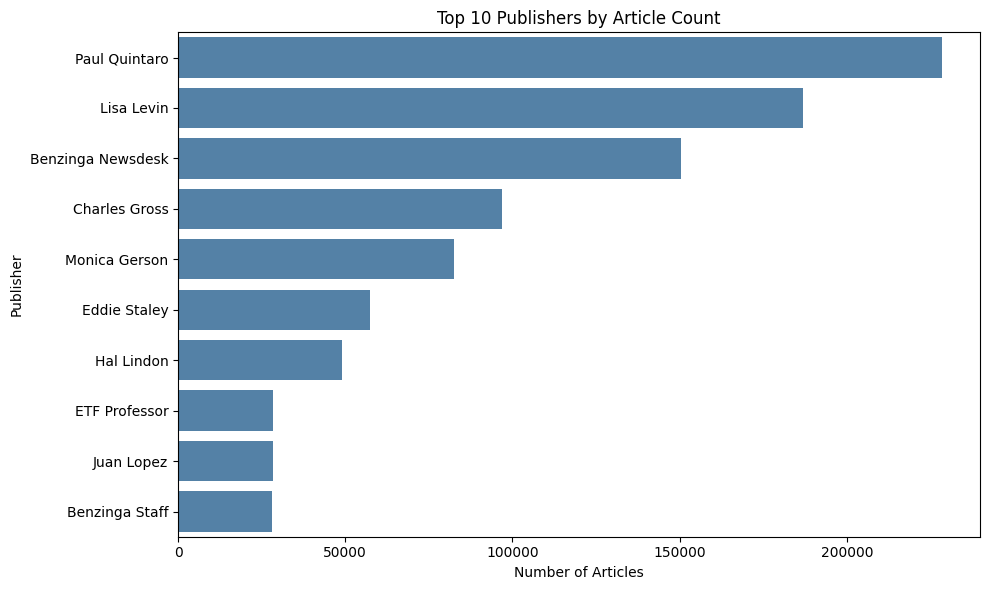


Top Domains from Email Publishers:
                   domain  article_count
0            benzinga.com           7937
1               gmail.com            139
2            andyswan.com              5
3          investdiva.com              2
4           tothetick.com              2
5           eosdetroit.io              1
6  forextraininggroup.com              1
7         stockmetrix.net              1


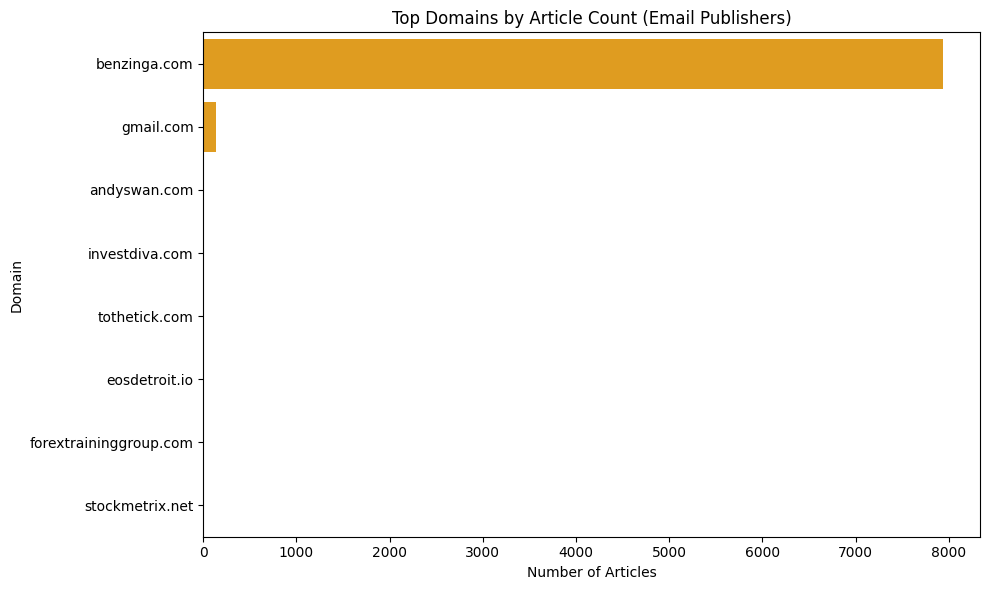


Total unique publishers: 1034
Email-based publishers: 18
Unique domains: 8


In [2]:
import sys
import os
# Path to your src folder
src_path = os.path.abspath("../src")  
sys.path.append(src_path)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
import re


# File path
file_path = r"C:\Users\gasha\OneDrive - Wollo University\Desktop\10Academy AIM 8\week 1\Nova-Financial-Solutions-Week1\data\raw_analyst_ratings.csv"
# Load the dataset
df = pd.read_csv(file_path)
df.dropna(subset=['headline', 'date'], inplace=True)
print("Data loaded and cleaned.")

# Drop missing publisher values
df.dropna(subset=['publisher'], inplace=True)

# Top Publishers by Article Count
publisher_counts = df['publisher'].value_counts().reset_index()
publisher_counts.columns = ['publisher', 'article_count']

print("\nTop 10 Publishers:")
print(publisher_counts.head(10))

# Plot top publishers
plt.figure(figsize=(10, 6))
sns.barplot(x='article_count', y='publisher', data=publisher_counts.head(10), color='steelblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# Identify Email Addresses and Extract Domains
# Regex to detect email pattern
email_pattern = r'^[^@]+@[^@]+\.[^@]+$'

# Filter publishers that look like emails
email_publishers = df[df['publisher'].str.match(email_pattern, na=False)].copy()

# Extract domain from email
email_publishers['domain'] = email_publishers['publisher'].apply(lambda x: x.split('@')[-1])

# Domain counts
domain_counts = email_publishers['domain'].value_counts().reset_index()
domain_counts.columns = ['domain', 'article_count']

print("\nTop Domains from Email Publishers:")
print(domain_counts.head(10))

# Plot top domains
plt.figure(figsize=(10, 6))
sns.barplot(x='article_count', y='domain', data=domain_counts.head(10), color='orange')
plt.title('Top Domains by Article Count (Email Publishers)')
plt.xlabel('Number of Articles')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

# Insights
print(f"\nTotal unique publishers: {df['publisher'].nunique()}")
print(f"Email-based publishers: {email_publishers['publisher'].nunique()}")
print(f"Unique domains: {email_publishers['domain'].nunique()}")
